# Visualization and Analysis with the Dataset: ***Tips***
In this notebook, we will be applying various visualizations on "tips" dataset from seaborn.
## Importing the Libraries and the Dataset
In this section, we will be importing the necessary libraries and frameworks along with the dataset from the seaborn library.

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [200]:
df = sns.load_dataset("tips")

In [201]:
display(df.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **Dataset Description**
- `tips` dataset, consists of information of restaurant bills and tips.
- Variables included:  
  - **total_bill**: Total bill  
  - **tip**: Tip amount  
  - **sex**: Gender (male/female)  
  - **smoker**: smoker/not smoker  
  - **day**: Day (Thu, Fri, Sat, Sun)  
  - **time**: The time of the day (Lunch/Dinner)  
  - **size**: Size of the table (amount of people)

---

In [202]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


None

In [203]:
display(df.describe())

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [204]:
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

total_bill: 229
tip: 123
sex: 2
smoker: 2
day: 4
time: 2
size: 6


In [205]:
cat_cols = df.columns[df.dtypes == "category"]

for col in cat_cols:
  print(f"{col}: {df[col].unique()}")

sex: ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
smoker: ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
time: ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


In [206]:
display(df.isnull().sum())

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


No missing values! This data is as clean as my heart.
* From now on we will be applying different methods: label encoding and one-hot encoding along with outlier analysis and without outlier analysis.
Dataset names will be as follows:

| Outlier Analysis -> | With | Without |
| -------- | ------- | ------- |
| Label Encoded  | df_label_oa | df_label |
| One-Hot Encoded  | df_onehot_oa | df_onehot |

## Encoding Categorical Data
First, we need to encode the categorical data. Then, we will be using df_onehot to be one-hot-encoded; while df_label to be label-encoded.

In [207]:
# outlier analizi yapıp bi de öyle görselleştir yan yana subplot koy
df_label = df.copy()
df_onehot = df.copy()

**Label Encoding**

In [208]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_label["sex"] = le.fit_transform(df_label["sex"])
df_label["smoker"] = le.fit_transform(df_label["smoker"])
df_label["day"] = le.fit_transform(df_label["day"])
df_label["time"] = le.fit_transform(df_label["time"])

In [209]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


In [210]:
def outlier_analysis(df):
  from scipy.stats import zscore
  for col in df.columns:

      plt.boxplot(df[col], vert=False, patch_artist=True)
      plt.title(f"Boxplot of {col}")
      plt.xlabel(col)
      plt.show()

      print(f"\n--- {col} Column ---")

      # Outlier analysis with IQR method
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      print(f"Outlier amount: {len(outliers)}")

      # Outlier analysis with Z-score
      z_scores = zscore(df[col])
      outliers_z = df[np.abs(z_scores) > 3]
      print(f"Outlier amount with z-score: {len(outliers_z)}")

      # Draw the outliers to the limit
      df[col] = df[col].apply(
          lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
      )

  print("\nOutlier analysis and handling is done.")

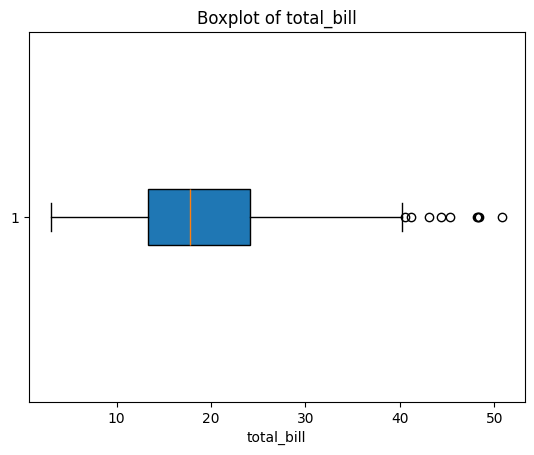


--- total_bill Column ---
IQR: 10.779999999999998, Lower Bound: -2.8224999999999945, Upper Bound: 40.29749999999999
Outlier amount: 9
Outlier amount with z-score: 4


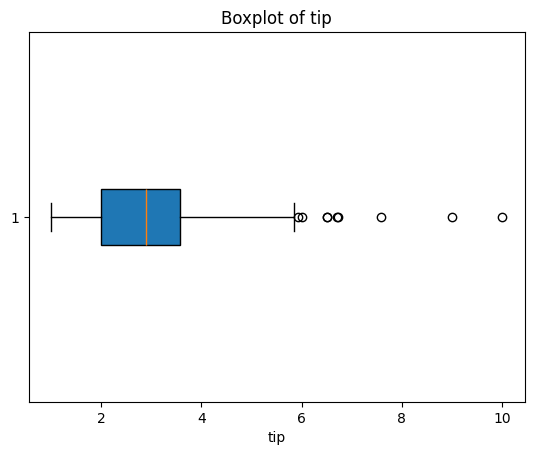


--- tip Column ---
IQR: 1.5625, Lower Bound: -0.34375, Upper Bound: 5.90625
Outlier amount: 9
Outlier amount with z-score: 3


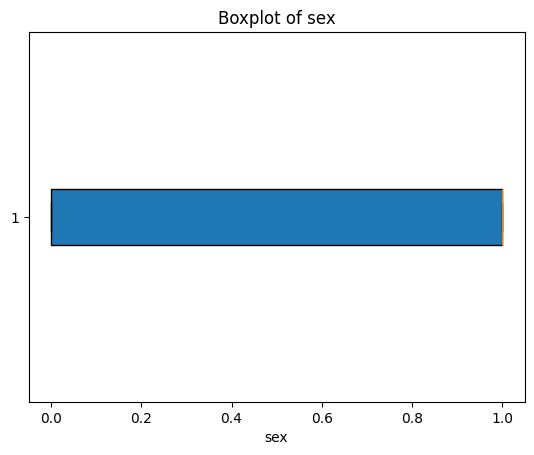


--- sex Column ---
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Outlier amount: 0
Outlier amount with z-score: 0


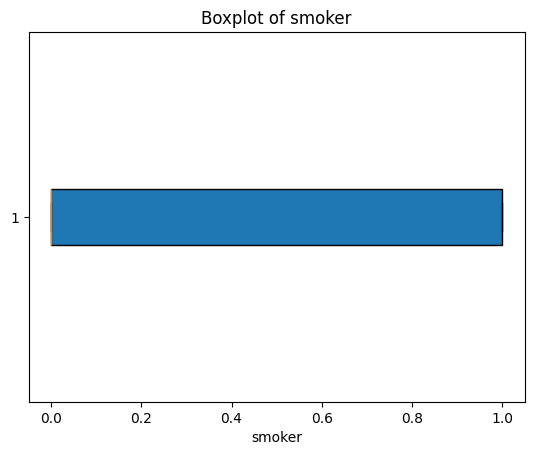


--- smoker Column ---
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Outlier amount: 0
Outlier amount with z-score: 0


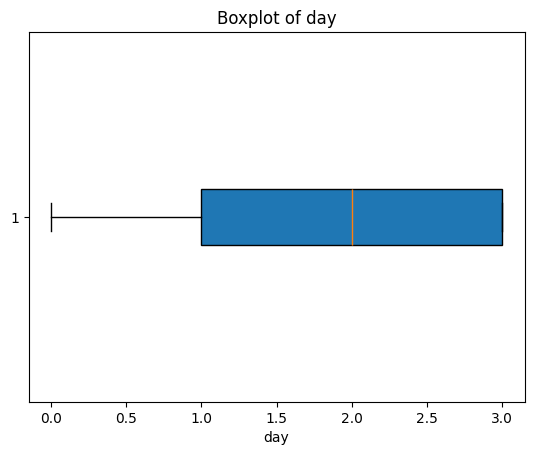


--- day Column ---
IQR: 2.0, Lower Bound: -2.0, Upper Bound: 6.0
Outlier amount: 0
Outlier amount with z-score: 0


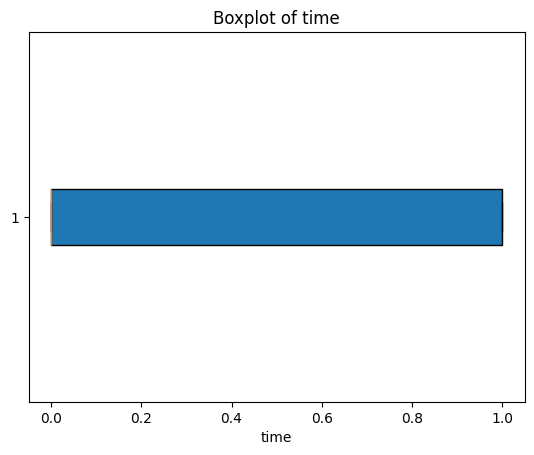


--- time Column ---
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Outlier amount: 0
Outlier amount with z-score: 0


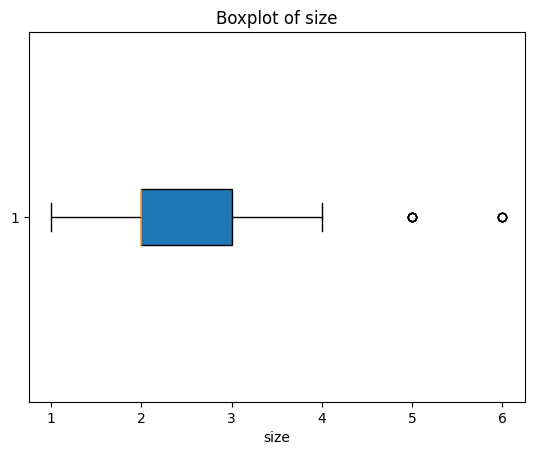


--- size Column ---
IQR: 1.0, Lower Bound: 0.5, Upper Bound: 4.5
Outlier amount: 9
Outlier amount with z-score: 4

Outlier analysis and handling is done.


In [211]:
df_label_oa = df_label.copy()

outlier_analysis(df_label_oa)

**One-hot Encoding**

In [212]:
df_onehot = pd.get_dummies(df_onehot, columns=cat_cols, drop_first=True)

In [213]:
bool_cols = df_onehot.columns[df_onehot.dtypes == "bool"]
for col in bool_cols:
  df_onehot[col] = df_onehot[col].astype(int)

In [214]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bill   244 non-null    float64
 1   tip          244 non-null    float64
 2   size         244 non-null    int64  
 3   sex_Female   244 non-null    int64  
 4   smoker_No    244 non-null    int64  
 5   day_Fri      244 non-null    int64  
 6   day_Sat      244 non-null    int64  
 7   day_Sun      244 non-null    int64  
 8   time_Dinner  244 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 17.3 KB


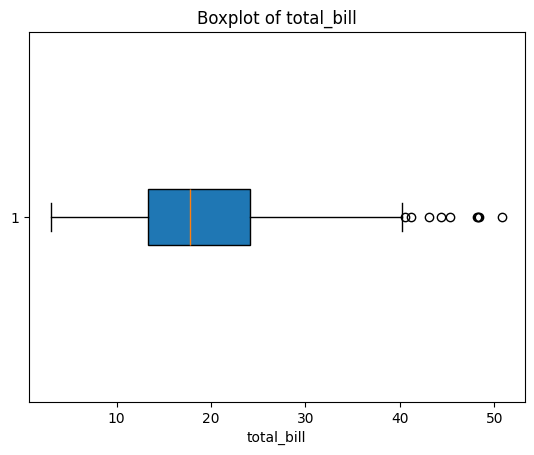


--- total_bill Column ---
IQR: 10.779999999999998, Lower Bound: -2.8224999999999945, Upper Bound: 40.29749999999999
Outlier amount: 9
Outlier amount with z-score: 4


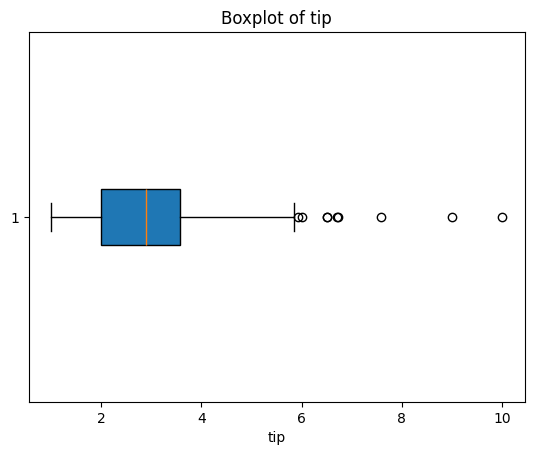


--- tip Column ---
IQR: 1.5625, Lower Bound: -0.34375, Upper Bound: 5.90625
Outlier amount: 9
Outlier amount with z-score: 3


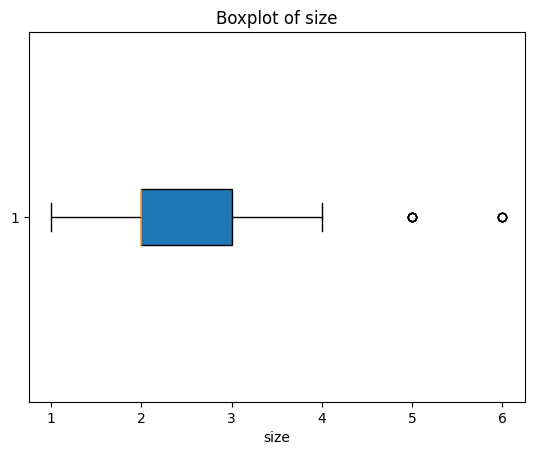


--- size Column ---
IQR: 1.0, Lower Bound: 0.5, Upper Bound: 4.5
Outlier amount: 9
Outlier amount with z-score: 4


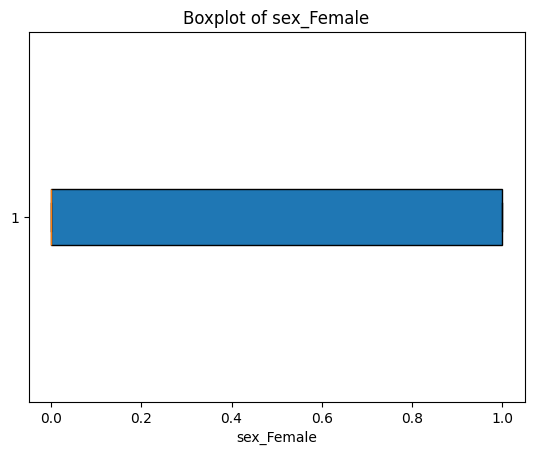


--- sex_Female Column ---
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Outlier amount: 0
Outlier amount with z-score: 0


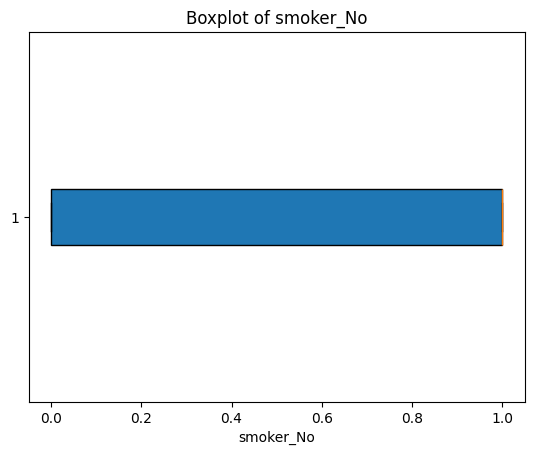


--- smoker_No Column ---
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Outlier amount: 0
Outlier amount with z-score: 0


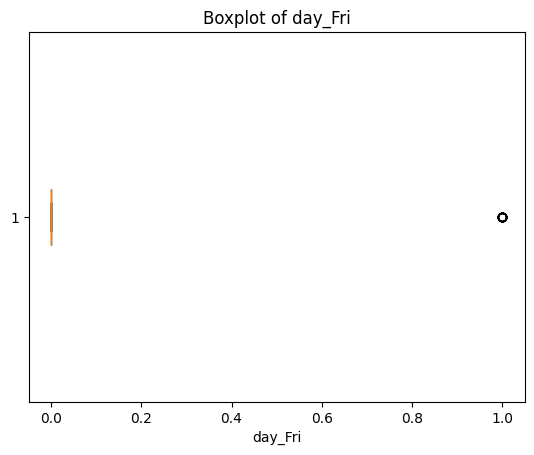


--- day_Fri Column ---
IQR: 0.0, Lower Bound: 0.0, Upper Bound: 0.0
Outlier amount: 19
Outlier amount with z-score: 19


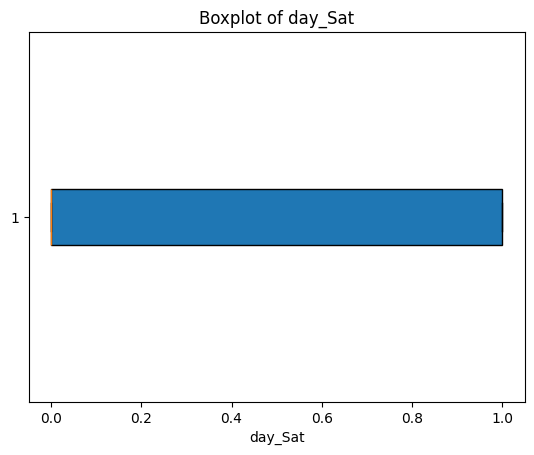


--- day_Sat Column ---
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Outlier amount: 0
Outlier amount with z-score: 0


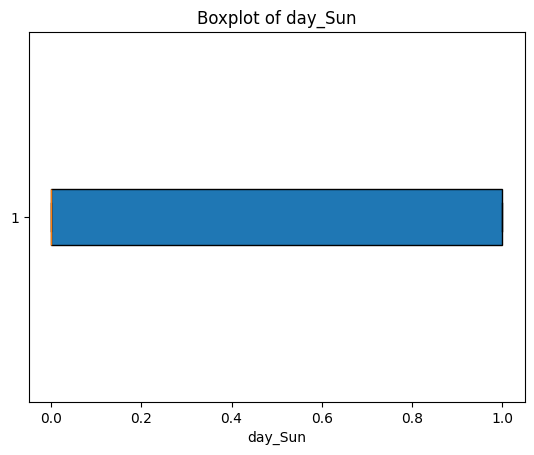


--- day_Sun Column ---
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Outlier amount: 0
Outlier amount with z-score: 0


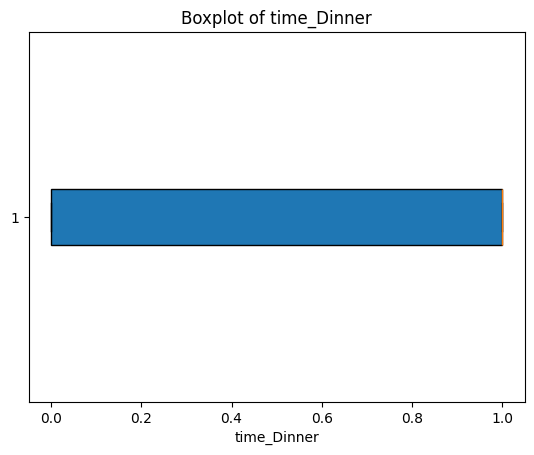


--- time_Dinner Column ---
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Outlier amount: 0
Outlier amount with z-score: 0

Outlier analysis and handling is done.


In [215]:
df_onehot_oa = df_onehot.copy()
outlier_analysis(df_onehot_oa)

## Visualizations
In this section, we will be handling various types of visualizations to have a better comprehension.

In [216]:
# Check what we have as function in seaborn library
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_base',
 '_compat',
 '_core',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix

### 1. Relationship between total_bill and tip
* The relationship between total_bill and tip columns is visualized.
* Colors are differentiated by the smoker/not smoker variables.
---

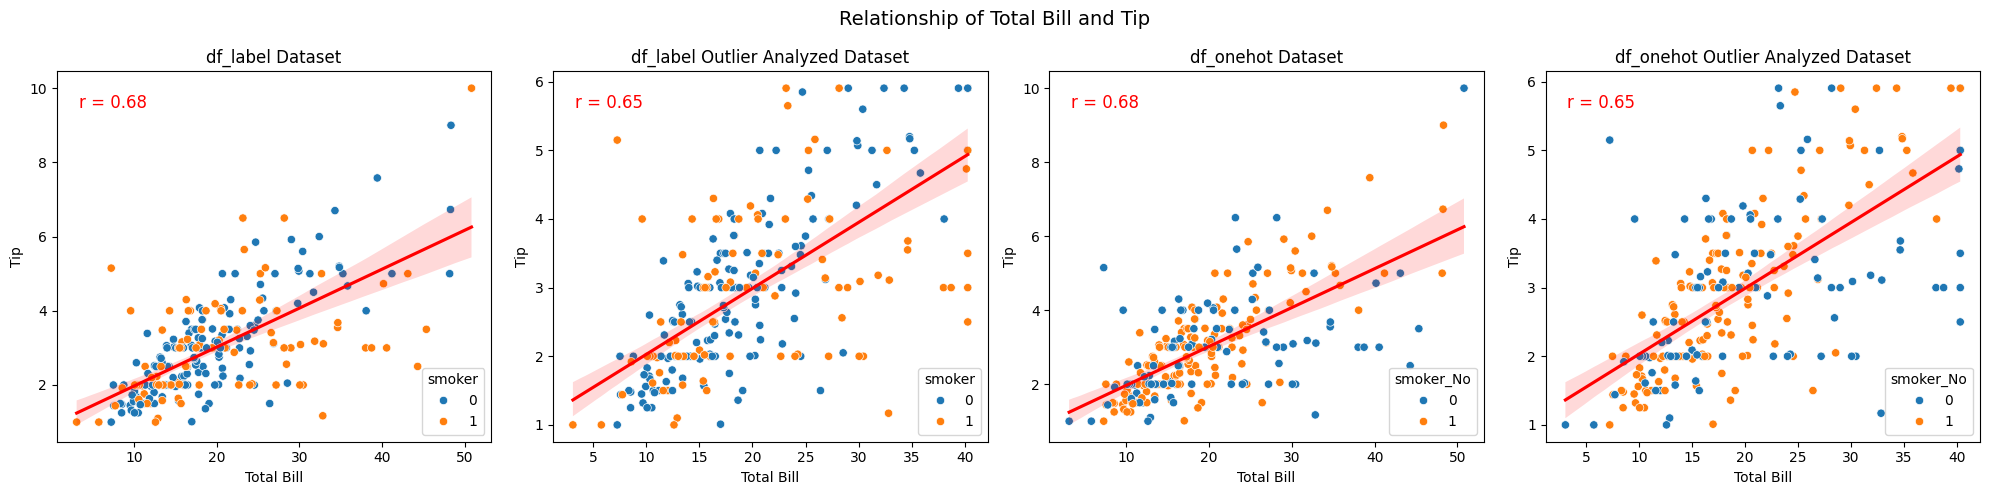

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Convert to a 1D list for easy indexing

datasets = [df_label, df_label_oa, df_onehot, df_onehot_oa]
titles = ["df_label Dataset", "df_label Outlier Analyzed Dataset",
          "df_onehot Dataset", "df_onehot Outlier Analyzed Dataset"]

for i, df in enumerate(datasets):
    sns.scatterplot(data=df, x="total_bill", y="tip", hue="smoker" if i < 2 else "smoker_No", ax=axes[i])

    sns.regplot(data=df, x="total_bill", y="tip", scatter=False, ax=axes[i], color="red")

    r = df["total_bill"].corr(df["tip"])

    axes[i].text(0.05, 0.9, f"r = {r:.2f}", transform=axes[i].transAxes, fontsize=12, color="red")

    axes[i].set_xlabel("Total Bill")
    axes[i].set_ylabel("Tip")
    axes[i].set_title(titles[i])

plt.suptitle("Relationship of Total Bill and Tip", fontsize=14)
plt.tight_layout()
plt.show()

Here, we can observe that the relationship between the *Total Bill* and *Tip* columns shows a moderate correlation. Additionally, addressing the outliers reduces the correlation, as we are essentially removing values that could be beneficial.

In [218]:
# Interactive Version
fig = px.scatter(df, x='total_bill', y='tip', color='smoker_No')
fig.show()

Here, we can observe a broader and interactive form of the scatter plot for df dataset.
### **2. Total Bill Distribution According to Days**  
* The total bill distribution according to days is calculated and analyzed.
* Median and outlier values for each day are inspected.
* When are the total bill is greater? is interpreted.

---

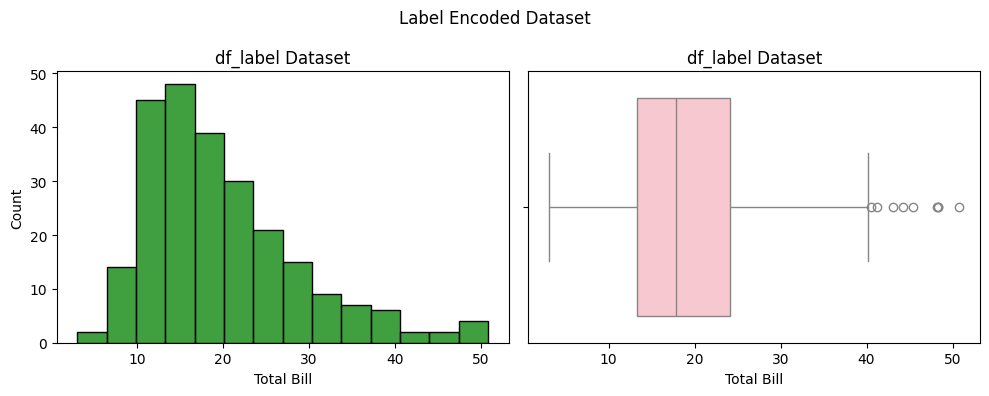

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten() # flattening to make indexing easier

sns.histplot(data = df_label, x="total_bill", color="green", ax=axes[0])
axes[0].set_xlabel("Total Bill")
axes[0].set_title("df_label Dataset")

sns.boxplot(data = df_label, x="total_bill", color="pink", ax=axes[1])
axes[1].set_xlabel("Total Bill")
axes[1].set_title("df_label Dataset")

plt.suptitle("Label Encoded Dataset")
plt.tight_layout()
plt.show()

Here, we see some outliers that affect the outcome. The histogram is right-skewed and the median value for boxplot is arund 19, while upper bound is 40. Let's consider them together with the plots below.

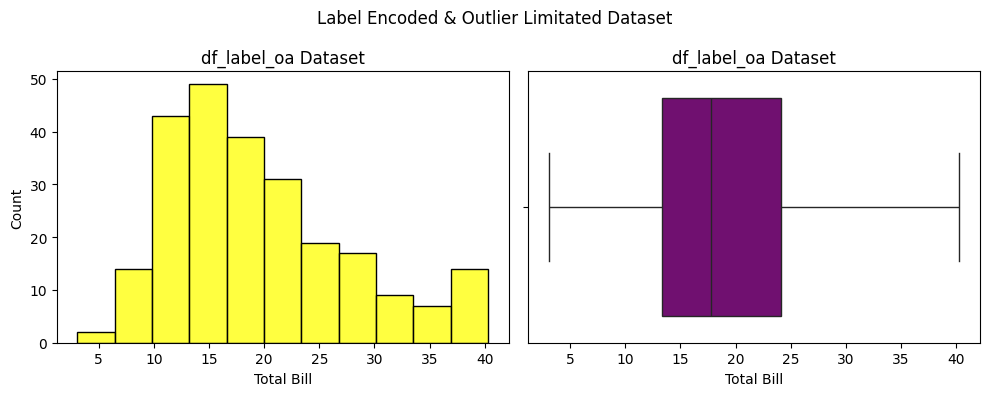

In [220]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten() # flattening to make indexing easier

sns.histplot(data = df_label_oa, x="total_bill", color="yellow", ax=axes[0])
axes[0].set_xlabel("Total Bill")
axes[0].set_title("df_label_oa Dataset")

sns.boxplot(data = df_label_oa, x="total_bill", color="purple", ax=axes[1])
axes[1].set_xlabel("Total Bill")
axes[1].set_title("df_label_oa Dataset")

plt.suptitle("Label Encoded & Outlier Limitated Dataset")
plt.tight_layout()
plt.show()

Here we can see that the total bill distribution is mostly collected around 10-20 whilst the median is around 17. Upper and lower bounds of boxplot have changed and since it's not a drastical change, histogram is still a right-skewed graphic but the amount of greater values (30-40) have increased.

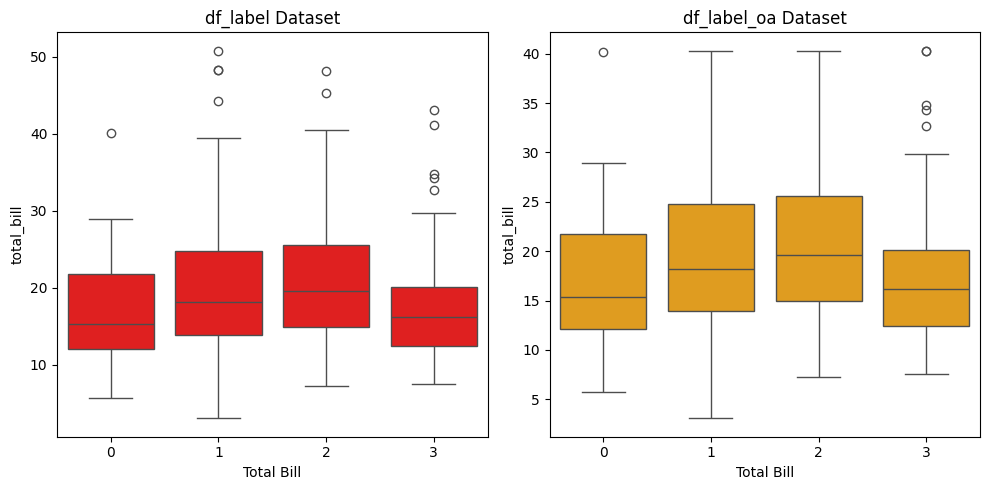

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

sns.boxplot(data = df_label, x="day", y="total_bill", color="red", ax=axes[0])
axes[0].set_xlabel("Total Bill")
axes[0].set_title("df_label Dataset")

sns.boxplot(data = df_label_oa, x="day", y="total_bill", color="orange", ax=axes[1])
axes[1].set_xlabel("Total Bill")
axes[1].set_title("df_label_oa Dataset")

plt.tight_layout()
plt.show()

In the plots above, we see that outlier limitation makes a lot of change in terms of median, quartiles and upper and lower bounds. While checking the not-limitated plot, we see that median values are so near in average in a daily manner.
#### **3. Tip Rates According to Table Sizes**  
- A new column is added:  

   tip_rate = (tip \ total_bill)*100
  
- Average tip rate is visualized according to table size by using barplots.
- In which table sizes the tip rate is greater?

---

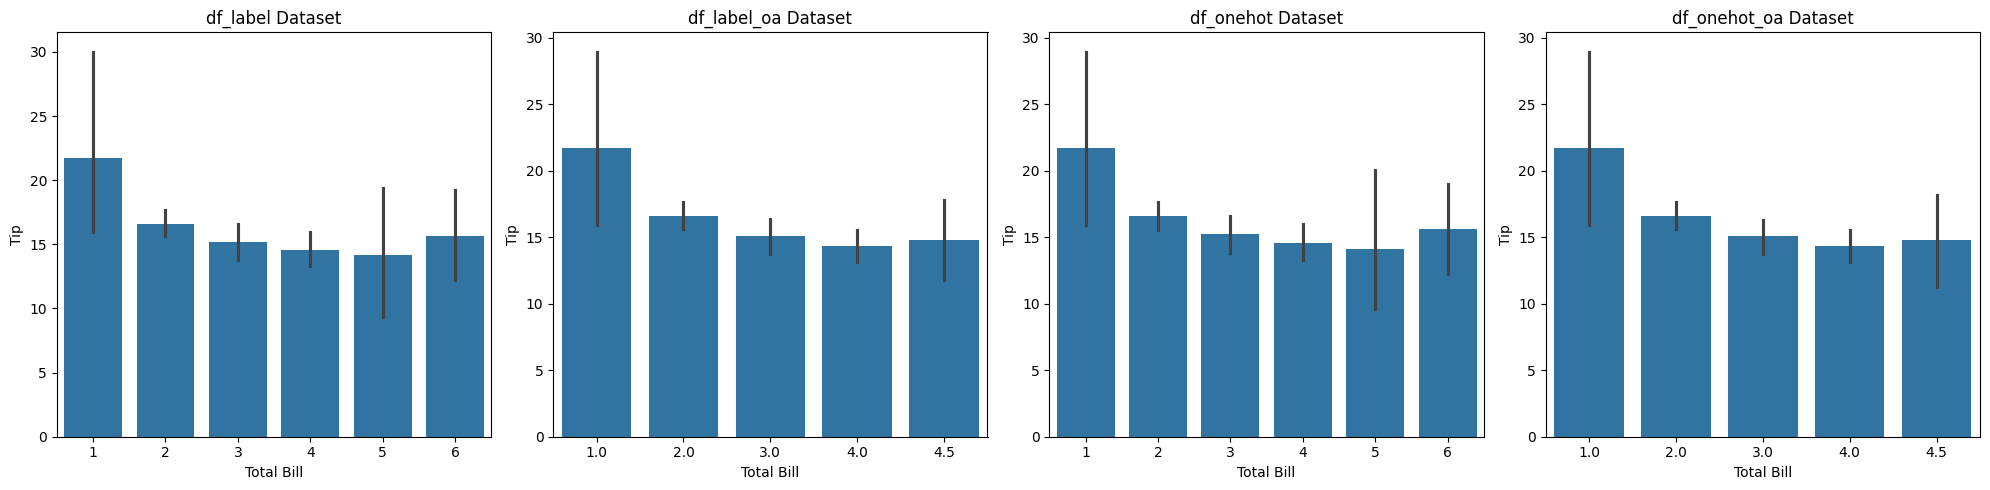

In [222]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten() # flattening to make indexing easier

df_label["tip_rate"] = (df_label["tip"] / df_label["total_bill"]) * 100
sns.barplot(data=df_label, x="size", y="tip_rate", ax=axes[0])
axes[0].set_xlabel("Total Bill")
axes[0].set_ylabel("Tip")
axes[0].set_title("df_label Dataset")

df_label_oa["tip_rate"] = (df_label_oa["tip"] / df_label_oa["total_bill"]) * 100
sns.barplot(data=df_label_oa, x="size", y="tip_rate", ax=axes[1])
axes[1].set_xlabel("Total Bill")
axes[1].set_ylabel("Tip")
axes[1].set_title("df_label_oa Dataset")

df_onehot["tip_rate"] = (df_onehot["tip"] / df_onehot["total_bill"]) * 100
sns.barplot(data=df_onehot, x="size", y="tip_rate", ax=axes[2])
axes[2].set_xlabel("Total Bill")
axes[2].set_ylabel("Tip")
axes[2].set_title("df_onehot Dataset")

df_onehot_oa["tip_rate"] = (df_onehot_oa["tip"] / df_onehot_oa["total_bill"]) * 100
sns.barplot(data=df_onehot_oa, x="size", y="tip_rate", ax=axes[3])
axes[3].set_xlabel("Total Bill")
axes[3].set_ylabel("Tip")
axes[3].set_title("df_onehot_oa Dataset")

plt.tight_layout()
plt.show()

The biggest difference in the plots comes from the outlier-analyzed (OA) datasets. The total bill categories are slightly adjusted, and the error bars are smaller, meaning there’s less variation in tip amounts. Some bars are also slightly shorter, showing that outliers previously caused higher fluctuations. Overall, the trend stays the same—higher total bills generally mean slightly lower tips.
#### **4. Tip Distribution According to Time of the Day**  
- Compare the tip distribution during Lunch and Dinner using a Histogram or KDE plot.
- Interpret the results: In which time period are the tips higher?

---

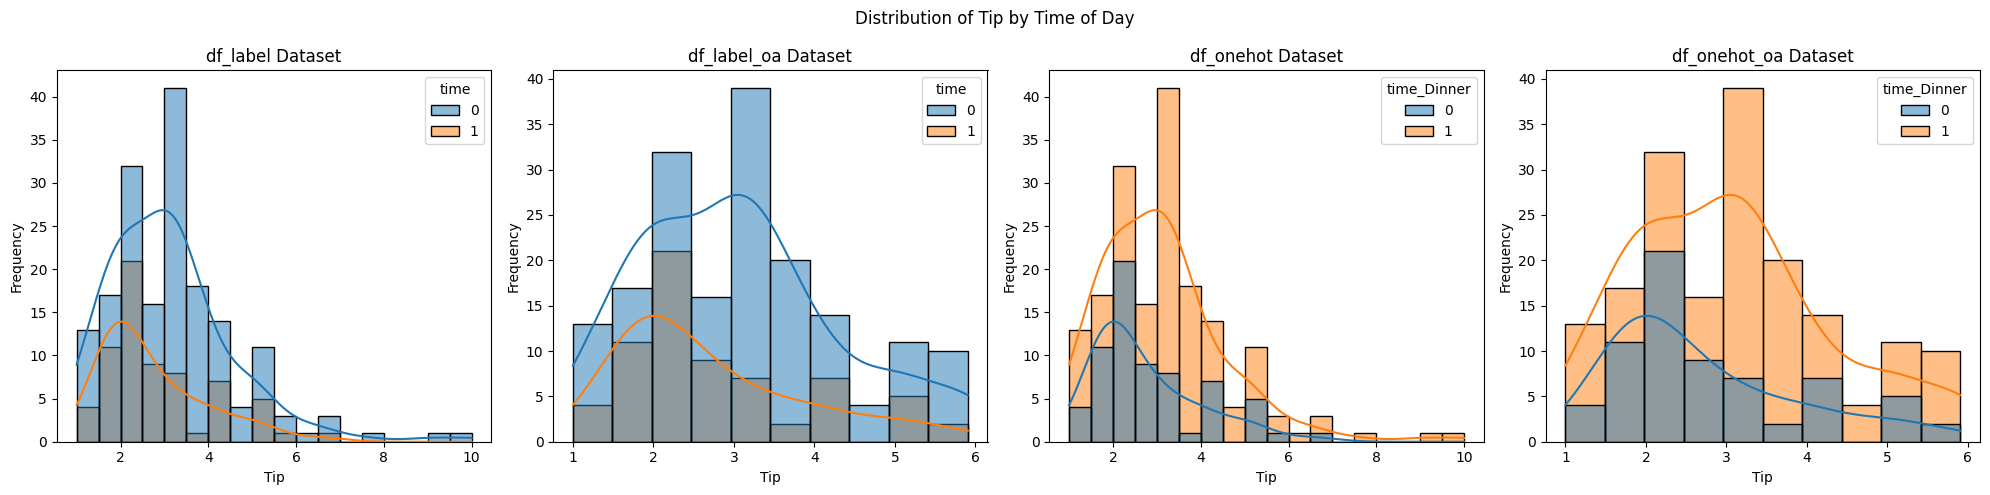

In [223]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten() # flattening to make indexing easier

sns.histplot(data=df_label, x="tip", hue="time", kde=True, ax=axes[0])
sns.color_palette("pastel")
axes[0].set_xlabel("Tip")
axes[0].set_ylabel("Frequency")
axes[0].set_title("df_label Dataset")

sns.histplot(data=df_label_oa, x="tip", hue="time", kde=True, ax=axes[1])
sns.color_palette("pastel")
axes[1].set_xlabel("Tip")
axes[1].set_ylabel("Frequency")
axes[1].set_title("df_label_oa Dataset")

sns.histplot(data=df_onehot, x="tip", hue="time_Dinner", kde=True, ax=axes[2])
sns.color_palette("pastel")
axes[2].set_xlabel("Tip")
axes[2].set_ylabel("Frequency")
axes[2].set_title("df_onehot Dataset")

sns.histplot(data=df_onehot_oa, x="tip", hue="time_Dinner", kde=True, ax=axes[3])
sns.color_palette("pastel")
axes[3].set_xlabel("Tip")
axes[3].set_ylabel("Frequency")
axes[3].set_title("df_onehot_oa Dataset")

plt.suptitle("Distribution of Tip by Time of Day")
plt.tight_layout()
plt.show()

Here, time variable represents 0 and 1, accordingly with Dinner and Lunch. So, we can say that we can get clearer ideas by using one hot encoding and tips are mostly given in Dinner time circle of the day.
### **Correlation Analysis**  
- Sayısal değişkenler arasındaki korelasyonu incelemek için bir **Heatmap** oluşturun.  
- En yüksek korelasyonlu değişken çiftlerini yorumlayın.

---

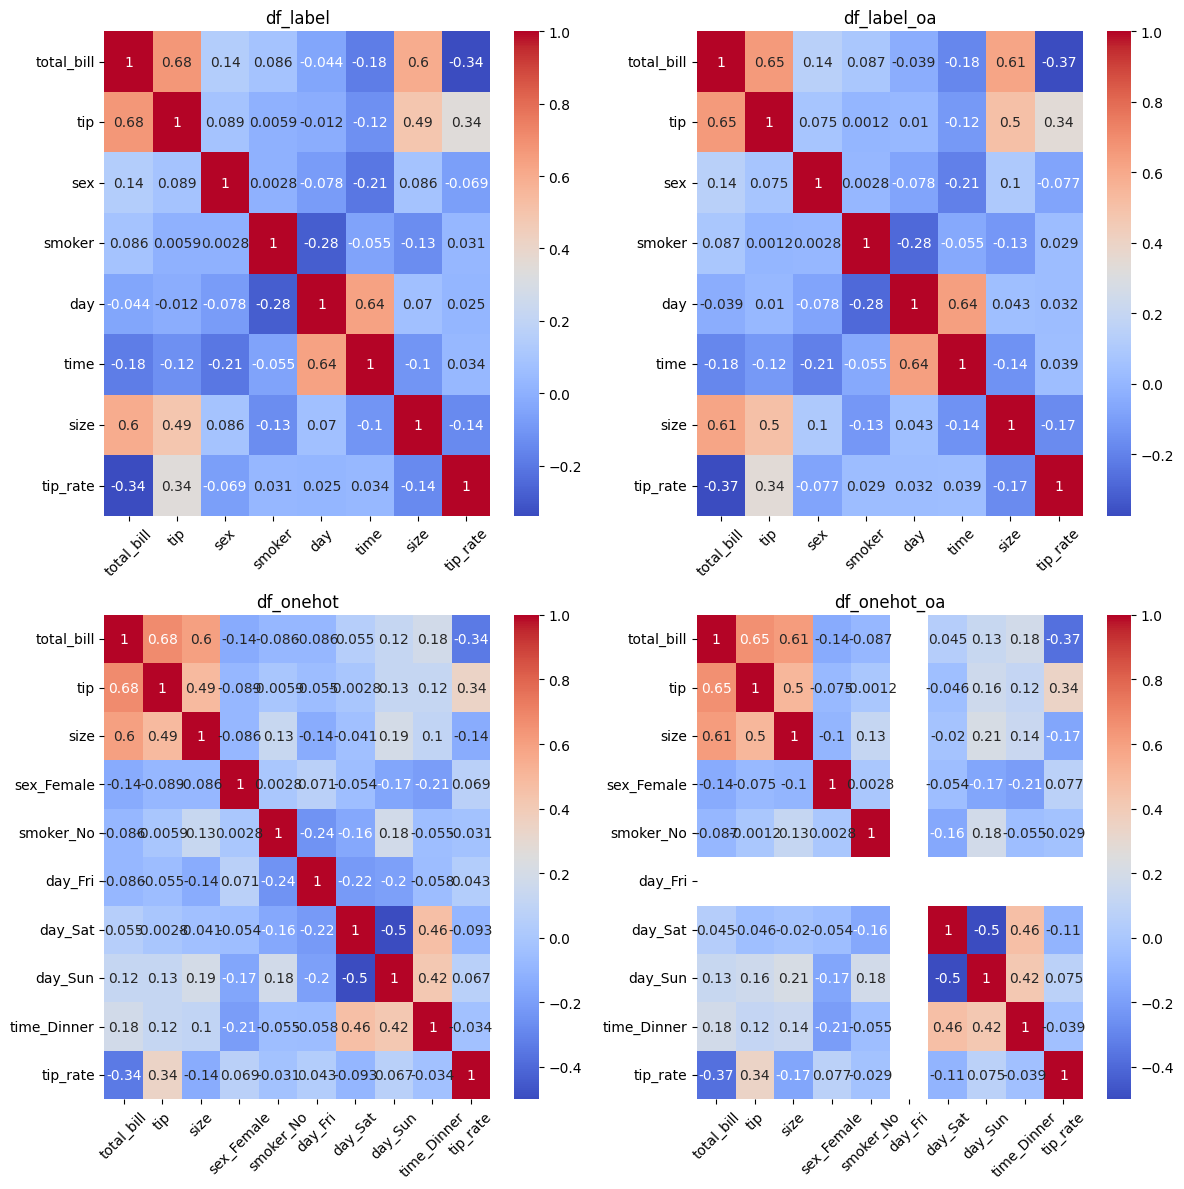

In [224]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes = axes.flatten()
liste = ["df_label", "df_label_oa", "df_onehot", "df_onehot_oa"]

for i, df in enumerate([df_label, df_label_oa, df_onehot, df_onehot_oa]):
    global liste
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0)
    axes[i].set_title(f"{liste[i]}")

plt.tight_layout()
plt.show()

- What is a Heatmap?

A heatmap visually represents data in a matrix format where individual values are depicted by varying colors. In the context of a correlation heatmap, it shows the strength and direction of relationships between variables. Stronger correlations are often highlighted with more intense colors (such as dark blue for negative or dark red for positive), while weaker correlations appear with lighter colors. This allows you to quickly identify which variables are positively or negatively correlated.

* Here we can clearly see that *tip* and *total_bill* columns have the highest correlation amongst all the features, we can create some further ideas by using machine learning models later on.